### DS-SF-36 | 11 | predict pregnancy

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# from sklearn import preprocessing, linear_model, model_selection, metrics

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-13-walget-train.csv'))
df.head()

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,...,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
0,Female,Home,False,False,NaN,...,False,True,False,False,True
1,Female,PO Box,False,False,False,...,False,False,False,False,True
2,Male,Apartment,False,True,False,...,False,False,False,False,False
3,Male,Home,False,False,False,...,False,False,False,False,True
4,Female,PO Box,False,False,False,...,False,False,False,False,False


In [3]:
df.shape

(600, 18)

In [4]:
df.IsPregnant.value_counts()

True     300
False    300
Name: IsPregnant, dtype: int64

Some of the features that are highly prective of the IsPregnant are:

-RecentlyPurchasedPregnancyTest
-RecentlyPurchasedBirthControl
-RecentlyPurchasedFolicAcidSupplements
-RecentlyPurchasedFeminineHygieneProducts
-RecentlyPurchasedPrenatalVitamins
etc

In [63]:
lst1=[
    'AccountHolderImpliedGender',
 'AccountHolderAddress',
 'RecentlyPurchasedPregnancyTest',
 'RecentlyPurchasedBirthControl',
 'RecentlyPurchasedFeminineHygieneProducts',
 'RecentlyPurchasedFolicAcidSupplements',
 'RecentlyPurchasedPrenatalVitamins',
 'RecentlyPurchasedPrenatalYogaDVD',
 'RecentlyPurchasedBodyPillow',
 'RecentlyPurchasedGingerAle',
 'RecentlyPurchasedSeaBands',
 'PurchasedCigarettesRegularlyUntilRecentlyThenStopped',
 'RecentlyPurchasedCigarettes',
 'RecentlyPurchasedSmokingCessationProducts',
 'PurchasedWineRegularlyUntilRecentlyThenStopped',
 'RecentlyPurchasedWine',
 'RecentlyPurchasedMaternityClothing']
for i in lst1:
    print(pd.crosstab(df.IsPregnant, df[i], normalize='columns'))
    print('                                                              ')

AccountHolderImpliedGender    Female      Male
IsPregnant                                    
False                       0.451827  0.572614
True                        0.548173  0.427386
                                                              
AccountHolderAddress  Apartment      Home  PO Box
IsPregnant                                       
False                  0.555556  0.457627     0.5
True                   0.444444  0.542373     0.5
                                                              
RecentlyPurchasedPregnancyTest     False     True 
IsPregnant                                        
False                           0.531876  0.088889
True                            0.468124  0.911111
                                                              
RecentlyPurchasedBirthControl     False     True 
IsPregnant                                       
False                          0.437984  0.909091
True                           0.562016  0.090909
                   

In [51]:
pd.crosstab(df.IsPregnant, df.RecentlyPurchasedPregnancyTest, normalize='columns')

RecentlyPurchasedPregnancyTest,False,True
IsPregnant,,
False,0.531876,0.088889
True,0.468124,0.911111


In [5]:
for i in list(df.columns.values):
    print ("***************************************************************")
    print ("                                                               ")
    print ("frequency table for " + i)
    print(df.groupby(i).IsPregnant.value_counts(dropna=False, normalize=True))

***************************************************************
                                                               
frequency table for AccountHolderImpliedGender
AccountHolderImpliedGender  IsPregnant
Female                      True          0.548173
                            False         0.451827
Male                        False         0.572614
                            True          0.427386
Name: IsPregnant, dtype: float64
***************************************************************
                                                               
frequency table for AccountHolderAddress
AccountHolderAddress  IsPregnant
Apartment             False         0.555556
                      True          0.444444
Home                  True          0.542373
                      False         0.457627
PO Box                False         0.500000
                      True          0.500000
Name: IsPregnant, dtype: float64
********************************************

In [6]:
df.RecentlyPurchasedPregnancyTest.value_counts(dropna=False)

False    549
True      45
NaN        6
Name: RecentlyPurchasedPregnancyTest, dtype: int64

In [7]:
list(df.columns.values)

['AccountHolderImpliedGender',
 'AccountHolderAddress',
 'RecentlyPurchasedPregnancyTest',
 'RecentlyPurchasedBirthControl',
 'RecentlyPurchasedFeminineHygieneProducts',
 'RecentlyPurchasedFolicAcidSupplements',
 'RecentlyPurchasedPrenatalVitamins',
 'RecentlyPurchasedPrenatalYogaDVD',
 'RecentlyPurchasedBodyPillow',
 'RecentlyPurchasedGingerAle',
 'RecentlyPurchasedSeaBands',
 'PurchasedCigarettesRegularlyUntilRecentlyThenStopped',
 'RecentlyPurchasedCigarettes',
 'RecentlyPurchasedSmokingCessationProducts',
 'PurchasedWineRegularlyUntilRecentlyThenStopped',
 'RecentlyPurchasedWine',
 'RecentlyPurchasedMaternityClothing',
 'IsPregnant']

## create dummy variables for all the true and false

In [8]:
lst1=[
 'RecentlyPurchasedPregnancyTest',
 'RecentlyPurchasedBirthControl',
 'RecentlyPurchasedFeminineHygieneProducts',
 'RecentlyPurchasedFolicAcidSupplements',
 'RecentlyPurchasedPrenatalVitamins',
 'RecentlyPurchasedPrenatalYogaDVD',
 'RecentlyPurchasedBodyPillow',
 'RecentlyPurchasedGingerAle',
 'RecentlyPurchasedSeaBands',
 'PurchasedCigarettesRegularlyUntilRecentlyThenStopped',
 'RecentlyPurchasedCigarettes',
 'RecentlyPurchasedSmokingCessationProducts',
 'PurchasedWineRegularlyUntilRecentlyThenStopped',
 'RecentlyPurchasedWine',
 'RecentlyPurchasedMaternityClothing',
 'IsPregnant']
for i in lst1:
    df[i+'_True']=df[i].apply(lambda x: (x == True) * 1)
    
df.head()

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,...,RecentlyPurchasedSmokingCessationProducts_True,PurchasedWineRegularlyUntilRecentlyThenStopped_True,RecentlyPurchasedWine_True,RecentlyPurchasedMaternityClothing_True,IsPregnant_True
0,Female,Home,False,False,NaN,...,0,1,0,0,1
1,Female,PO Box,False,False,False,...,0,0,0,0,1
2,Male,Apartment,False,True,False,...,0,0,0,0,0
3,Male,Home,False,False,False,...,0,0,0,0,1
4,Female,PO Box,False,False,False,...,0,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 34 columns):
AccountHolderImpliedGender                                   542 non-null object
AccountHolderAddress                                         594 non-null object
RecentlyPurchasedPregnancyTest                               594 non-null object
RecentlyPurchasedBirthControl                                593 non-null object
RecentlyPurchasedFeminineHygieneProducts                     590 non-null object
RecentlyPurchasedFolicAcidSupplements                        599 non-null object
RecentlyPurchasedPrenatalVitamins                            594 non-null object
RecentlyPurchasedPrenatalYogaDVD                             594 non-null object
RecentlyPurchasedBodyPillow                                  591 non-null object
RecentlyPurchasedGingerAle                                   594 non-null object
RecentlyPurchasedSeaBands                                    589 non-null object
Purc

In [10]:
# df.replace([True,False],[1,0], inplace=True)

## create dummy variables

In [11]:
for i in ['AccountHolderImpliedGender','AccountHolderAddress']:
    i = pd.get_dummies(df[i] ,prefix = i, drop_first=True, dummy_na=True)
    df = pd.merge(df, i ,left_index=True, right_index=True)
    df.head()

In [15]:
df.head(10)

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,...,AccountHolderImpliedGender_Male,AccountHolderImpliedGender_nan,AccountHolderAddress_Home,AccountHolderAddress_PO Box,AccountHolderAddress_nan
0,Female,Home,False,False,NaN,...,0,0,1,0,0
1,Female,PO Box,False,False,False,...,0,0,0,1,0
2,Male,Apartment,False,True,False,...,1,0,0,0,0
3,Male,Home,False,False,False,...,1,0,1,0,0
4,Female,PO Box,False,False,False,...,0,0,0,1,0
5,Female,Home,False,True,False,...,0,0,1,0,0
6,Male,Apartment,False,True,True,...,1,0,0,0,0
7,Male,Apartment,False,False,True,...,1,0,0,0,0
8,Female,Apartment,True,False,False,...,0,0,0,0,0
9,Female,Apartment,False,True,False,...,0,0,0,0,0


In [39]:
for i in lst1:
    print ("***************************************************************")
    print ("                                                               ")
    print ("frequency table for " + i)
    print(df.groupby(i).IsPregnant.mean())

***************************************************************
                                                               
frequency table for RecentlyPurchasedPregnancyTest
RecentlyPurchasedPregnancyTest
False    0.468124
True     0.911111
Name: IsPregnant, dtype: float64
***************************************************************
                                                               
frequency table for RecentlyPurchasedBirthControl
RecentlyPurchasedBirthControl
False    0.562016
True     0.090909
Name: IsPregnant, dtype: float64
***************************************************************
                                                               
frequency table for RecentlyPurchasedFeminineHygieneProducts
RecentlyPurchasedFeminineHygieneProducts
False    0.547809
True     0.193182
Name: IsPregnant, dtype: float64
***************************************************************
                                                               
frequency table f

In [16]:
list(df.columns.values)

['AccountHolderImpliedGender',
 'AccountHolderAddress',
 'RecentlyPurchasedPregnancyTest',
 'RecentlyPurchasedBirthControl',
 'RecentlyPurchasedFeminineHygieneProducts',
 'RecentlyPurchasedFolicAcidSupplements',
 'RecentlyPurchasedPrenatalVitamins',
 'RecentlyPurchasedPrenatalYogaDVD',
 'RecentlyPurchasedBodyPillow',
 'RecentlyPurchasedGingerAle',
 'RecentlyPurchasedSeaBands',
 'PurchasedCigarettesRegularlyUntilRecentlyThenStopped',
 'RecentlyPurchasedCigarettes',
 'RecentlyPurchasedSmokingCessationProducts',
 'PurchasedWineRegularlyUntilRecentlyThenStopped',
 'RecentlyPurchasedWine',
 'RecentlyPurchasedMaternityClothing',
 'IsPregnant',
 'RecentlyPurchasedPregnancyTest_True',
 'RecentlyPurchasedBirthControl_True',
 'RecentlyPurchasedFeminineHygieneProducts_True',
 'RecentlyPurchasedFolicAcidSupplements_True',
 'RecentlyPurchasedPrenatalVitamins_True',
 'RecentlyPurchasedPrenatalYogaDVD_True',
 'RecentlyPurchasedBodyPillow_True',
 'RecentlyPurchasedGingerAle_True',
 'RecentlyPurchasedS

## single varaible logistic regression

In [12]:
def Xy(df):
    X = df[ ['RecentlyPurchasedPregnancyTest_True'] ] # X is a DataFrame
    y = df.IsPregnant # y is a Series
    return X, y

X, y = Xy(df)

In [13]:
model1=LogisticRegression().fit(X,y)

In [14]:
score = model1.score(X,y)
print ("The model produces an accuracy score of {:.2f} percent".format(score*100))

The model produces an accuracy score of 56.17 percent


## logistic regression with all the variables

In [22]:
def Xy(df):
    X = df[ ['RecentlyPurchasedPregnancyTest_True',
 'RecentlyPurchasedBirthControl_True',
 'RecentlyPurchasedFeminineHygieneProducts_True',
 'RecentlyPurchasedFolicAcidSupplements_True',
 'RecentlyPurchasedPrenatalVitamins_True',
 'RecentlyPurchasedPrenatalYogaDVD_True',
 'RecentlyPurchasedBodyPillow_True',
 'RecentlyPurchasedGingerAle_True',
 'RecentlyPurchasedSeaBands_True',
 'PurchasedCigarettesRegularlyUntilRecentlyThenStopped_True',
 'RecentlyPurchasedCigarettes_True',
 'RecentlyPurchasedSmokingCessationProducts_True',
 'PurchasedWineRegularlyUntilRecentlyThenStopped_True',
 'RecentlyPurchasedWine_True',
 'RecentlyPurchasedMaternityClothing_True',
 'AccountHolderImpliedGender_Male',
 'AccountHolderImpliedGender_nan',
 'AccountHolderAddress_Home',
 'AccountHolderAddress_PO Box',
 'AccountHolderAddress_nan'] ] # X is a DataFrame
    y = df.IsPregnant # y is a Series
    return X, y

X, y = Xy(df)

In [23]:
model2=LogisticRegression().fit(X,y)
score = model2.score(X,y)
print ("The model produces an accuracy score of {:.2f} percent".format(score*100))

The model produces an accuracy score of 85.50 percent


## split the test into 30% test 70% training

In [25]:
#Make a train test split of the spotify data and train logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=12345)
model3 = LogisticRegression().fit(X_train, y_train)
preds = model3.predict(X_test)

In [37]:
coef = pd.DataFrame(zip(X.columns, np.transpose(model3.coef_[0])), columns=["coef", "value"])
coef

,coef,value
0,RecentlyPurchasedPregnancyTest_True,1.362813
1,RecentlyPurchasedBirthControl_True,-2.127909
2,RecentlyPurchasedFeminineHygieneProducts_True,-1.656199
3,RecentlyPurchasedFolicAcidSupplements_True,2.876642
4,RecentlyPurchasedPrenatalVitamins_True,2.158607
5,RecentlyPurchasedPrenatalYogaDVD_True,0.535095
6,RecentlyPurchasedBodyPillow_True,0.533384
7,RecentlyPurchasedGingerAle_True,0.964540
8,RecentlyPurchasedSeaBands_True,0.739996
9,PurchasedCigarettesRegularlyUntilRecentlyThenS...,0.770015


In [26]:
confusion_matrix(y_test, preds)

array([[84,  6],
       [18, 72]])

In [27]:
#Calculate precision and recall scores
ps = float(precision_score(y_test, preds))
rs = float(recall_score(y_test, preds))

print ("The precision score is {:.2f} and the recall score is {:.2f}".format(ps*100, rs*100))

The precision score is 92.31 and the recall score is 80.00


In [29]:
#Derive probabilities of class 1 from the test set
test_probs = model3.predict_proba(X_test)[:,1]
#Pass in the test_probs variable and the true test labels aka y_test in the roc_curve function
fpr, tpr, thres = roc_curve(y_test, test_probs)
#Will explain the fpr, tpr, thresholds

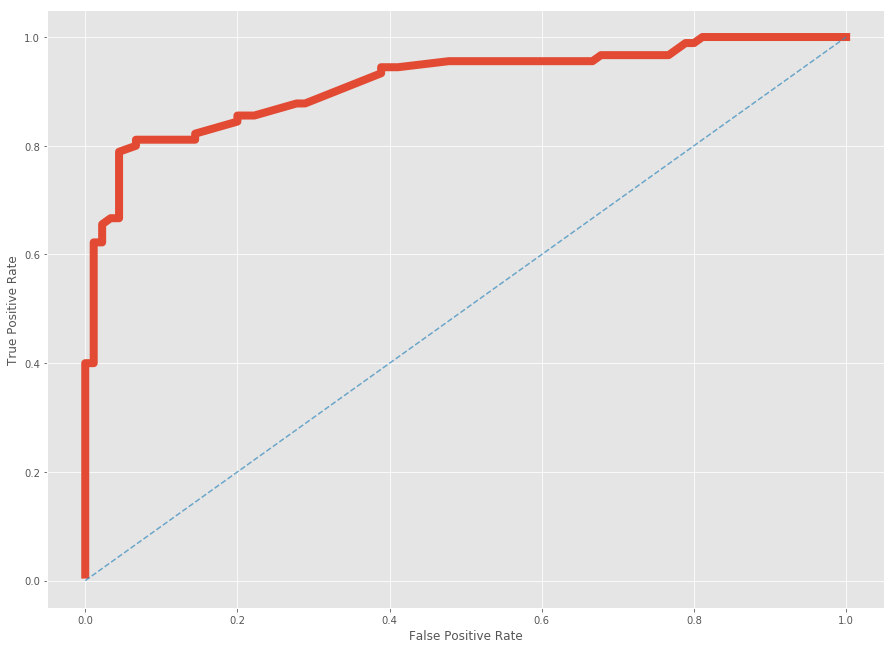

In [30]:
#Plotting False Positive Rates vs the True Positive Rates
#Dotted line represents a useless model
plt.figure(figsize=(15,11))
plt.plot(fpr, tpr, linewidth=8)
plt.plot([0,1], [0,1], "--", alpha=.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.show()

## cross validation

In [33]:
cross_val_score(LogisticRegression(), X,y, cv=10, scoring="accuracy")

array([ 0.83333333,  0.88333333,  0.88333333,  0.88333333,  0.76666667,
        0.85      ,  0.81666667,  0.9       ,  0.85      ,  0.83333333])

In [34]:
#Use cross_val_score method to generate the average accuracy score for 5 CVs
mean_cv_score = cross_val_score(LogisticRegression(), X,y, cv=10, scoring="accuracy").mean()

print ("The cross validated accuracy score is {:.2f} percent").format(mean_cv_score*100)

The cross validated accuracy score is 85.00 percent
